In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import faculty.datasets as datasets
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick

from pandas import Series, DataFrame
import os
from functools import reduce


### Reading World Cup 2018 data

In [3]:
#Reading the football summary csv files
summary_sum18 = pd.read_csv('/project/2018/1Summary/summarysum.csv', index_col = 0)
offensive_sum18 = pd.read_csv('/project/2018/1Summary/offensivesum.csv', index_col = 0)
defensive_sum18 = pd.read_csv('/project/2018/1Summary/defensivesum.csv', index_col = 0)
clearances_defensive_sum18 = pd.read_csv('/project/2018/1Summary/clearancesdefensivesum.csv', index_col = 0)
ariels_offensive_sum18 = pd.read_csv('/project/2018/1Summary/arielsoffensivesum.csv', index_col = 0)

In [4]:
#Reading the passtypes csv files
assists_pass_type18 = pd.read_csv('/project/2018/3PassTypes/PassTypesAssists.csv')
key_passes_pass_type18 = pd.read_csv('/project/2018/3PassTypes/PassTypesKeyPasses.csv')
detailed_pass_type18 = pd.read_csv('/project/2018/3PassTypes/PassTypesPassDetailed.csv')

In [5]:
#Reading the positional csv files
attack_sides_positional18 = pd.read_csv('/project/2018/4Positional/PositionalAttackSides.csv')
action_zones_positional18 = pd.read_csv('/project/2018/4Positional/PositionalActionZones.csv')
shot_directions_positional18 = pd.read_csv('/project/2018/4Positional/PositionalShotDirections.csv')


## Merge the datasets

#### All the Summary tables are merged into one table called "all_summary18"

In [6]:
summary_sum18.head()
offensive_sum18.head()
defensive_sum18.head()
clearances_defensive_sum18.head()
ariels_offensive_sum18.head()

,goal,shotsPerGame,yellow-card,red-card-,possession%,passSuccess%,aerialWonPG,stat-value
team-link,,,,,,,,
1. Belgium,16,15.1,11,0,52.1,86.3,13.7,7.06
2. Brazil,8,20.8,7,0,56.8,87.9,14.6,7.06
3. France,14,11.6,12,0,49.6,81.5,20.6,6.93
4. Croatia,14,16.1,15,0,55.4,81.2,27.6,6.92
5. Russia,11,9.6,6,1,39.5,71.0,30.6,6.85


,shotsPG,shotOnTargetPG,dribbleWonPG,foulGivenPG,stat-value
team-link,,,,,
1. Belgium,15.1,5.7,13.3,10.6,7.06
2. Brazil,20.8,8.0,14.8,14.4,7.06
3. France,11.6,4.1,11.0,14.7,6.93
4. Croatia,16.1,4.1,12.0,15.3,6.92
5. Russia,9.6,3.4,7.4,11.2,6.85


,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,stat-value
team-link,,,,,,
1. Belgium,15.1,13.4,7.4,14.1,1.1,7.06
2. Brazil,8.4,17.6,12.0,9.8,1.8,7.06
3. France,9.3,16.7,10.3,13.1,0.4,6.93
4. Croatia,12.1,15.9,10.3,16.0,1.6,6.92
5. Russia,15.2,19.0,14.0,19.0,1.4,6.85


,clearanceTotal,stat-value
team-link,,
1. Belgium,16.9,7.06
2. Brazil,16.2,7.06
3. France,26.1,6.93
4. Uruguay,17.4,6.83
5. England,16.1,6.82


,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
team-link,,,,
1. Belgium,25.9,13.7,12.1,7.06
2. Brazil,30.2,14.6,15.6,7.06
3. France,36.6,20.6,16.0,6.93
4. Uruguay,38.4,17.8,20.6,6.83
5. England,38.3,23.9,14.4,6.82


In [74]:
summary_sum18.head()

,goal,shotsPerGame,yellow-card,red-card-,possession%,passSuccess%,aerialWonPG,stat-value
team-link,,,,,,,,
1. Belgium,16,15.1,11,0,52.1,86.3,13.7,7.06
2. Brazil,8,20.8,7,0,56.8,87.9,14.6,7.06
3. France,14,11.6,12,0,49.6,81.5,20.6,6.93
4. Croatia,14,16.1,15,0,55.4,81.2,27.6,6.92
5. Russia,11,9.6,6,1,39.5,71.0,30.6,6.85


#### Cleaning each table accordingly

In [75]:
#For each table, we are doing the following cleaning steps:
#1) reseting the index as the index was the team-link and we want it to be a column
#2) renaming the column from team-link to country_name so that it can be easier to use it
#3) splitting the country_name column to separate it from the . and then dropping the second column created called "name"

summary_sum18 = summary_sum18.reset_index()
summary_sum18 = summary_sum18.rename(columns={"team-link": "country_name"})
summary_sum18[['number','country_name']] = summary_sum18.country_name.str.split(".",expand=True,)
summary_sum18 = summary_sum18.drop(columns=["number"])
summary_sum18.head()

offensive_sum18 = offensive_sum18.reset_index()
offensive_sum18 = offensive_sum18.rename(columns={"team-link": "country_name"})
offensive_sum18[['number','country_name']] = offensive_sum18.country_name.str.split(".",expand=True,)
offensive_sum18 = offensive_sum18.drop(columns=["number"])
offensive_sum18.head()

defensive_sum18 = defensive_sum18.reset_index()
defensive_sum18 = defensive_sum18.rename(columns={"team-link": "country_name"})
defensive_sum18[['number','country_name']] = defensive_sum18.country_name.str.split(".",expand=True,)
defensive_sum18 = defensive_sum18.drop(columns=["number"])
defensive_sum18.head()

clearances_defensive_sum18 = clearances_defensive_sum18.reset_index()
clearances_defensive_sum18 = clearances_defensive_sum18.rename(columns={"team-link": "country_name"})
clearances_defensive_sum18[['number','country_name']] = clearances_defensive_sum18.country_name.str.split(".",expand=True,)
clearances_defensive_sum18 = clearances_defensive_sum18.drop(columns=["number"])
clearances_defensive_sum18.head()

ariels_offensive_sum18 = ariels_offensive_sum18.reset_index()
ariels_offensive_sum18 = ariels_offensive_sum18.rename(columns={"team-link": "country_name"})
ariels_offensive_sum18[['number','country_name']] = ariels_offensive_sum18.country_name.str.split(".",expand=True,)
ariels_offensive_sum18 = ariels_offensive_sum18.drop(columns=["number"])
ariels_offensive_sum18.head()



,country_name,goal,shotsPerGame,yellow-card,red-card-,possession%,passSuccess%,aerialWonPG,stat-value
0,Belgium,16,15.1,11,0,52.1,86.3,13.7,7.06
1,Brazil,8,20.8,7,0,56.8,87.9,14.6,7.06
2,France,14,11.6,12,0,49.6,81.5,20.6,6.93
3,Croatia,14,16.1,15,0,55.4,81.2,27.6,6.92
4,Russia,11,9.6,6,1,39.5,71.0,30.6,6.85


,country_name,shotsPG,shotOnTargetPG,dribbleWonPG,foulGivenPG,stat-value
0,Belgium,15.1,5.7,13.3,10.6,7.06
1,Brazil,20.8,8.0,14.8,14.4,7.06
2,France,11.6,4.1,11.0,14.7,6.93
3,Croatia,16.1,4.1,12.0,15.3,6.92
4,Russia,9.6,3.4,7.4,11.2,6.85


,country_name,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,stat-value
0,Belgium,15.1,13.4,7.4,14.1,1.1,7.06
1,Brazil,8.4,17.6,12.0,9.8,1.8,7.06
2,France,9.3,16.7,10.3,13.1,0.4,6.93
3,Croatia,12.1,15.9,10.3,16.0,1.6,6.92
4,Russia,15.2,19.0,14.0,19.0,1.4,6.85


,country_name,clearanceTotal,stat-value
0,Belgium,16.9,7.06
1,Brazil,16.2,7.06
2,France,26.1,6.93
3,Uruguay,17.4,6.83
4,England,16.1,6.82


,country_name,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Belgium,25.9,13.7,12.1,7.06
1,Brazil,30.2,14.6,15.6,7.06
2,France,36.6,20.6,16.0,6.93
3,Uruguay,38.4,17.8,20.6,6.83
4,England,38.3,23.9,14.4,6.82


In [76]:
# here we make a list with all the dataframes we want to merge and allocate
# them in a variable called data_frames and then we merge them all in a variable called all_summary18
data_frames = [summary_sum18, offensive_sum18, defensive_sum18, clearances_defensive_sum18, ariels_offensive_sum18]
all_summary18 = reduce(lambda  left,right: pd.merge(left,right,on=['country_name'],
                                            how='inner'), data_frames)
all_summary18.head()



,country_name,goal,shotsPerGame,yellow-card,red-card-,possession%,passSuccess%,aerialWonPG,stat-value_x,shotsPG,...,interceptionPG,foulsPG,offsideGivenPG,stat-value_x,clearanceTotal,stat-value_y,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Belgium,16,15.1,11,0,52.1,86.3,13.7,7.06,15.1,...,7.4,14.1,1.1,7.06,16.9,7.06,25.9,13.7,12.1,7.06
1,Brazil,8,20.8,7,0,56.8,87.9,14.6,7.06,20.8,...,12.0,9.8,1.8,7.06,16.2,7.06,30.2,14.6,15.6,7.06
2,France,14,11.6,12,0,49.6,81.5,20.6,6.93,11.6,...,10.3,13.1,0.4,6.93,26.1,6.93,36.6,20.6,16.0,6.93
3,Croatia,14,16.1,15,0,55.4,81.2,27.6,6.92,16.1,...,10.3,16.0,1.6,6.92,21.6,6.80,45.9,24.3,21.6,6.80
4,Russia,11,9.6,6,1,39.5,71.0,30.6,6.85,9.6,...,14.0,19.0,1.4,6.85,24.2,6.75,49.2,28.8,20.4,6.75


In [77]:
#after merging, we can see that some tables had the same column called "stat-value"
#we can then proceed in dropping two of them and keeping the third one as same columns.
all_summary18 = all_summary18.drop(columns=["stat-value_x","stat-value_y"])

#there are also some columns where their name format is not ideal so we proceeded in updating them 
all_summary18 = all_summary18.rename(columns={"yellow-card":"yellow_card", 
                                              "red-card-":"red_card",
                                             "possession%":"possession_percentage",
                                             "passSuccess%":"passSuccess_percentage"})
all_summary18.head()


,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,aerialWonPG,shotsPG,shotOnTargetPG,...,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,clearanceTotal,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Belgium,16,15.1,11,0,52.1,86.3,13.7,15.1,5.7,...,15.1,13.4,7.4,14.1,1.1,16.9,25.9,13.7,12.1,7.06
1,Brazil,8,20.8,7,0,56.8,87.9,14.6,20.8,8.0,...,8.4,17.6,12.0,9.8,1.8,16.2,30.2,14.6,15.6,7.06
2,France,14,11.6,12,0,49.6,81.5,20.6,11.6,4.1,...,9.3,16.7,10.3,13.1,0.4,26.1,36.6,20.6,16.0,6.93
3,Croatia,14,16.1,15,0,55.4,81.2,27.6,16.1,4.1,...,12.1,15.9,10.3,16.0,1.6,21.6,45.9,24.3,21.6,6.80
4,Russia,11,9.6,6,1,39.5,71.0,30.6,9.6,3.4,...,15.2,19.0,14.0,19.0,1.4,24.2,49.2,28.8,20.4,6.75


In [78]:
# In order to be easier to merge the tables with each other, we sorted them 
# alphabetically based on their country_name

all_summary18 = all_summary18.sort_values("country_name")
all_summary18 = all_summary18.reset_index(drop=True)

# we also want to remove the space from the country_name to be easier to use
# from ' Argentina' to 'Argentina'
all_summary18["country_name"] = [x.strip() for x in all_summary18['country_name']]
all_summary18.head()

,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,aerialWonPG,shotsPG,shotOnTargetPG,...,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,clearanceTotal,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Argentina,6,13.8,11,0,61.1,85.0,18.3,13.8,4.5,...,10.0,16.5,7.8,14.0,1.5,18.5,35.8,18.3,17.5,6.57
1,Australia,2,11.0,7,0,50.9,83.7,20.3,11.0,2.3,...,8.7,15.0,8.0,12.7,1.0,23.7,36.3,20.3,16.0,6.47
2,Belgium,16,15.1,11,0,52.1,86.3,13.7,15.1,5.7,...,15.1,13.4,7.4,14.1,1.1,16.9,25.9,13.7,12.1,7.06
3,Brazil,8,20.8,7,0,56.8,87.9,14.6,20.8,8.0,...,8.4,17.6,12.0,9.8,1.8,16.2,30.2,14.6,15.6,7.06
4,Colombia,6,9.8,9,1,50.2,79.9,21.8,9.8,3.3,...,11.5,15.8,9.0,15.8,1.8,24.0,44.3,19.3,25.0,6.76


#### Checking for null values

In [79]:
all_summary18.isnull().sum()

country_name              0
goal                      0
shotsPerGame              0
yellow_card               0
red_card                  0
possession_percentage     0
passSuccess_percentage    0
aerialWonPG               0
shotsPG                   0
shotOnTargetPG            0
dribbleWonPG              0
foulGivenPG               0
shotsConcededPG           0
tacklePG                  0
interceptionPG            0
foulsPG                   0
offsideGivenPG            0
clearanceTotal            0
duelAerialTotal           0
duelAerialWon             0
duelAerialLost            0
stat-value                0
dtype: int64

#### All the pass tables are merged into one table called "all_pass18"

In [80]:
assists_pass_type18.head()
key_passes_pass_type18.head()
detailed_pass_type18.head()

,team-link,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,stat-value
0,1. Belgium,0.4,0.0,0.4,0.0,0.9,1.7,7.06
1,2. Brazil,0.2,0.2,0.4,0.0,0.6,1.2,7.06
2,3. France,0.4,0.1,0.1,0.1,0.3,0.9,6.93
3,4. Uruguay,0.6,0.2,0.0,0.2,0.2,0.8,6.83
4,5. England,0.3,0.3,0.0,0.0,0.6,0.9,6.82


,team-link,keyPassesTotal,keyPassLong,keyPassShort,stat-value
0,1. Belgium,12.3,1.7,10.6,7.06
1,2. Brazil,16.2,3.2,13.0,7.06
2,3. France,8.3,0.9,7.4,6.93
3,4. Uruguay,8.0,1.8,6.2,6.83
4,5. England,9.3,2.7,6.6,6.82


,team-link,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,stat-value
0,1. Belgium,515.7,24.7,21.9,420.3,48.9,7.06
1,2. Brazil,556.6,23.2,12.0,466.2,55.2,7.06
2,3. France,436.9,34.1,25.7,322.0,55.0,6.93
3,4. Uruguay,433.0,29.6,28.4,315.2,59.8,6.83
4,5. England,506.4,34.0,27.3,399.6,45.6,6.82


In [81]:
#For each table, we are doing the following cleaning steps:
#1) renaming the column from team-link to country_name so that it can be easier to use it
#2) splitting the country_name column to separate it from the . and then dropping the second column created called "name"

assists_pass_type18 = assists_pass_type18.rename(columns={"team-link": "country_name"})
assists_pass_type18[['number','country_name']] = assists_pass_type18.country_name.str.split(".",expand=True,)
assists_pass_type18 = assists_pass_type18.drop(columns=["number"])
assists_pass_type18.head()

key_passes_pass_type18 = key_passes_pass_type18.rename(columns={"team-link": "country_name"})
key_passes_pass_type18[['number','country_name']] = key_passes_pass_type18.country_name.str.split(".",expand=True,)
key_passes_pass_type18 = key_passes_pass_type18.drop(columns=["number"])
key_passes_pass_type18.head()

detailed_pass_type18 = detailed_pass_type18.rename(columns={"team-link": "country_name"})
detailed_pass_type18[['number','country_name']] = detailed_pass_type18.country_name.str.split(".",expand=True,)
detailed_pass_type18 = detailed_pass_type18.drop(columns=["number"])
detailed_pass_type18.head()


,country_name,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,stat-value
0,Belgium,0.4,0.0,0.4,0.0,0.9,1.7,7.06
1,Brazil,0.2,0.2,0.4,0.0,0.6,1.2,7.06
2,France,0.4,0.1,0.1,0.1,0.3,0.9,6.93
3,Uruguay,0.6,0.2,0.0,0.2,0.2,0.8,6.83
4,England,0.3,0.3,0.0,0.0,0.6,0.9,6.82


,country_name,keyPassesTotal,keyPassLong,keyPassShort,stat-value
0,Belgium,12.3,1.7,10.6,7.06
1,Brazil,16.2,3.2,13.0,7.06
2,France,8.3,0.9,7.4,6.93
3,Uruguay,8.0,1.8,6.2,6.83
4,England,9.3,2.7,6.6,6.82


,country_name,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,stat-value
0,Belgium,515.7,24.7,21.9,420.3,48.9,7.06
1,Brazil,556.6,23.2,12.0,466.2,55.2,7.06
2,France,436.9,34.1,25.7,322.0,55.0,6.93
3,Uruguay,433.0,29.6,28.4,315.2,59.8,6.83
4,England,506.4,34.0,27.3,399.6,45.6,6.82


In [82]:
# here we make a list with all the dataframes we want to merge and allocate
# them in a variable called data_frames2 and then we merge them all in a variable called all_pass18
data_frames2 = [assists_pass_type18, detailed_pass_type18,key_passes_pass_type18]
all_pass18 = reduce(lambda  left,right: pd.merge(left,right,on=['country_name'],
                                            how='inner'), data_frames2)
all_pass18.head()



,country_name,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,stat-value_x,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,stat-value_y,keyPassesTotal,keyPassLong,keyPassShort,stat-value
0,Belgium,0.4,0.0,0.4,0.0,0.9,1.7,7.06,515.7,24.7,21.9,420.3,48.9,7.06,12.3,1.7,10.6,7.06
1,Brazil,0.2,0.2,0.4,0.0,0.6,1.2,7.06,556.6,23.2,12.0,466.2,55.2,7.06,16.2,3.2,13.0,7.06
2,France,0.4,0.1,0.1,0.1,0.3,0.9,6.93,436.9,34.1,25.7,322.0,55.0,6.93,8.3,0.9,7.4,6.93
3,Uruguay,0.6,0.2,0.0,0.2,0.2,0.8,6.83,433.0,29.6,28.4,315.2,59.8,6.83,8.0,1.8,6.2,6.83
4,England,0.3,0.3,0.0,0.0,0.6,0.9,6.82,506.4,34.0,27.3,399.6,45.6,6.82,9.3,2.7,6.6,6.82


In [83]:
# after merging, we can see that some tables had the same column called "stat-value"
# we can then proceed in dropping all of them as it's the same stat-value as in all_summary18 df.
all_pass18 = all_pass18.drop(columns=["stat-value_x","stat-value_y","stat-value"])
all_pass18.head()


,country_name,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,keyPassesTotal,keyPassLong,keyPassShort
0,Belgium,0.4,0.0,0.4,0.0,0.9,1.7,515.7,24.7,21.9,420.3,48.9,12.3,1.7,10.6
1,Brazil,0.2,0.2,0.4,0.0,0.6,1.2,556.6,23.2,12.0,466.2,55.2,16.2,3.2,13.0
2,France,0.4,0.1,0.1,0.1,0.3,0.9,436.9,34.1,25.7,322.0,55.0,8.3,0.9,7.4
3,Uruguay,0.6,0.2,0.0,0.2,0.2,0.8,433.0,29.6,28.4,315.2,59.8,8.0,1.8,6.2
4,England,0.3,0.3,0.0,0.0,0.6,0.9,506.4,34.0,27.3,399.6,45.6,9.3,2.7,6.6


In [84]:
# In order to be easier to merge the tables with each other, we sorted them 
# alphabetically based on their country_name

all_pass18 = all_pass18.sort_values("country_name")
all_pass18 = all_pass18.reset_index(drop=True)

# we also want to remove the space from the country_name to be easier to use
# from ' Argentina' to 'Argentina'
all_pass18["country_name"] = [x.strip() for x in all_pass18['country_name']]
all_pass18.head()

,country_name,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,keyPassesTotal,keyPassLong,keyPassShort
0,Argentina,0.3,0.0,0.3,0.0,0.8,1.3,583.8,22.0,25.5,474.3,62.0,9.5,0.8,8.8
1,Australia,0.0,0.0,0.0,0.0,0.0,0.0,479.0,25.7,28.7,375.3,49.3,8.0,1.7,6.3
2,Belgium,0.4,0.0,0.4,0.0,0.9,1.7,515.7,24.7,21.9,420.3,48.9,12.3,1.7,10.6
3,Brazil,0.2,0.2,0.4,0.0,0.6,1.2,556.6,23.2,12.0,466.2,55.2,16.2,3.2,13.0
4,Colombia,0.5,0.5,0.5,0.0,0.3,1.3,427.5,27.5,31.5,314.8,53.8,6.5,1.5,5.0


#### Checking for null values in the all_pass18 dataframe

In [85]:
all_pass18.isnull().sum()

country_name              0
assistCross               0
assistCorner              0
assistThroughball         0
assistFreekick            0
assistOther               0
assist                    0
passTotal                 0
passLongBallAccurate      0
passLongBallInaccurate    0
shortPassAccurate         0
shortPassInaccurate       0
keyPassesTotal            0
keyPassLong               0
keyPassShort              0
dtype: int64

#### All the position tables are merged into one table called "all_positions18"

In [86]:
attack_sides_positional18.head()
action_zones_positional18.head()
shot_directions_positional18.head()

,team-link,left-side,middle-side,right-side
0,Spain,47%,24%,30%
1,Panama,44%,23%,33%
2,Croatia,43%,23%,34%
3,Brazil,43%,29%,29%
4,Portugal,42%,22%,36%


,team-link,own-third,middle-third,opposition-third
0,Iran,34%,47%,20%
1,South Korea,34%,41%,25%
2,Egypt,33%,43%,24%
3,Sweden,32%,44%,24%
4,Peru,31%,46%,23%


,team-link,shot-left-side,shot-middle-side,shot-right-side
0,Brazil,28%,60%,13%
1,Argentina,27%,49%,24%
2,Belgium,26%,56%,18%
3,Costa Rica,25%,57%,18%
4,Egypt,25%,61%,14%


In [87]:
# here we make a list with all the dataframes we want to merge and allocate
# them in a variable called data_frames3 and then we merge them all in a variable called all_positions18
data_frames3 = [attack_sides_positional18, action_zones_positional18,shot_directions_positional18]
all_positions18 = reduce(lambda  left,right: pd.merge(left,right,on=['team-link'],
                                            how='inner'), data_frames3)
all_positions18.head()




,team-link,left-side,middle-side,right-side,own-third,middle-third,opposition-third,shot-left-side,shot-middle-side,shot-right-side
0,Spain,47%,24%,30%,19%,46%,35%,12%,73%,15%
1,Panama,44%,23%,33%,26%,54%,20%,24%,60%,16%
2,Croatia,43%,23%,34%,26%,47%,27%,23%,64%,13%
3,Brazil,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Portugal,42%,22%,36%,26%,46%,27%,23%,55%,23%


In [88]:
#replace all dashes with underscore symbol to be easier to use 
all_positions18.columns = all_positions18.columns.str.replace('-','_')

#rename team_link with country_name to be consistent with the other dataframes
all_positions18 = all_positions18.rename(columns={"team_link": "country_name"})
all_positions18.head()



,country_name,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Spain,47%,24%,30%,19%,46%,35%,12%,73%,15%
1,Panama,44%,23%,33%,26%,54%,20%,24%,60%,16%
2,Croatia,43%,23%,34%,26%,47%,27%,23%,64%,13%
3,Brazil,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Portugal,42%,22%,36%,26%,46%,27%,23%,55%,23%


In [89]:
# In order to be easier to merge the tables with each other, we sorted them 
# alphabetically based on their country_name

all_positions18 = all_positions18.sort_values("country_name")
all_positions18 = all_positions18.reset_index(drop=True)

# we also want to remove the space from the country_name to be easier to use
# from ' Argentina' to 'Argentina'
all_positions18["country_name"] = [x.strip() for x in all_positions18['country_name']]
all_positions18.head()


,country_name,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,33%,22%,45%,29%,48%,23%,7%,66%,27%


### All the three merged tables

In [90]:
all_summary18.head()
all_pass18.head()
all_positions18.head()

all_summary18.to_csv("all_summary18.csv")
all_pass18.to_csv("all_pass18.csv")


,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,aerialWonPG,shotsPG,shotOnTargetPG,...,shotsConcededPG,tacklePG,interceptionPG,foulsPG,offsideGivenPG,clearanceTotal,duelAerialTotal,duelAerialWon,duelAerialLost,stat-value
0,Argentina,6,13.8,11,0,61.1,85.0,18.3,13.8,4.5,...,10.0,16.5,7.8,14.0,1.5,18.5,35.8,18.3,17.5,6.57
1,Australia,2,11.0,7,0,50.9,83.7,20.3,11.0,2.3,...,8.7,15.0,8.0,12.7,1.0,23.7,36.3,20.3,16.0,6.47
2,Belgium,16,15.1,11,0,52.1,86.3,13.7,15.1,5.7,...,15.1,13.4,7.4,14.1,1.1,16.9,25.9,13.7,12.1,7.06
3,Brazil,8,20.8,7,0,56.8,87.9,14.6,20.8,8.0,...,8.4,17.6,12.0,9.8,1.8,16.2,30.2,14.6,15.6,7.06
4,Colombia,6,9.8,9,1,50.2,79.9,21.8,9.8,3.3,...,11.5,15.8,9.0,15.8,1.8,24.0,44.3,19.3,25.0,6.76


,country_name,assistCross,assistCorner,assistThroughball,assistFreekick,assistOther,assist,passTotal,passLongBallAccurate,passLongBallInaccurate,shortPassAccurate,shortPassInaccurate,keyPassesTotal,keyPassLong,keyPassShort
0,Argentina,0.3,0.0,0.3,0.0,0.8,1.3,583.8,22.0,25.5,474.3,62.0,9.5,0.8,8.8
1,Australia,0.0,0.0,0.0,0.0,0.0,0.0,479.0,25.7,28.7,375.3,49.3,8.0,1.7,6.3
2,Belgium,0.4,0.0,0.4,0.0,0.9,1.7,515.7,24.7,21.9,420.3,48.9,12.3,1.7,10.6
3,Brazil,0.2,0.2,0.4,0.0,0.6,1.2,556.6,23.2,12.0,466.2,55.2,16.2,3.2,13.0
4,Colombia,0.5,0.5,0.5,0.0,0.3,1.3,427.5,27.5,31.5,314.8,53.8,6.5,1.5,5.0


,country_name,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,33%,22%,45%,29%,48%,23%,7%,66%,27%


### Making heatmaps (correlation matrix) to see the correlation between the variables and decide if we any need to be dropped.

Text(0.5, 1.0, 'Correlation Matrix for summary football')

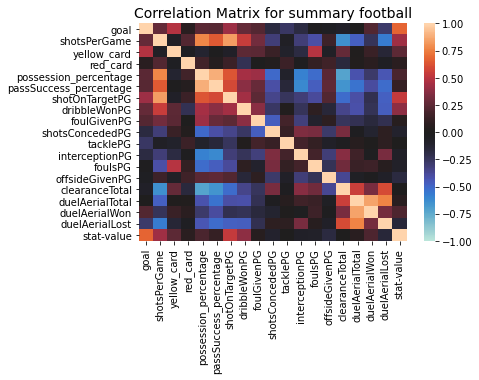

In [104]:
# First correlation matrix for the data in all_summary_18 dataset
dfCorr1 = pd.DataFrame(all_summary18)

corrMatrix1 = dfCorr1.corr()
ax = sns.heatmap(corrMatrix1,annot=False, vmin=-1, vmax=1, center=0)
#ax.set_ylim([0,20])
ax.set_title("Correlation Matrix for summary football", fontsize = 14)

_ = ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right')

plt.savefig("/project/Visualisation_graphs/Heatmap_football.png")

From correlation matrix above, we can see that there are some columns showing the same thing. For example shotsPG and shotsPerGame and also aerialwonPG and duelAerialWon. 
Therefore, we can proceed in dropping them.

In [92]:
all_summary18 = all_summary18.drop(columns={"shotsPG", "aerialWonPG"})
all_summary18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            32 non-null     object 
 1   goal                    32 non-null     int64  
 2   shotsPerGame            32 non-null     float64
 3   yellow_card             32 non-null     int64  
 4   red_card                32 non-null     int64  
 5   possession_percentage   32 non-null     float64
 6   passSuccess_percentage  32 non-null     float64
 7   shotOnTargetPG          32 non-null     float64
 8   dribbleWonPG            32 non-null     float64
 9   foulGivenPG             32 non-null     float64
 10  shotsConcededPG         32 non-null     float64
 11  tacklePG                32 non-null     float64
 12  interceptionPG          32 non-null     float64
 13  foulsPG                 32 non-null     float64
 14  offsideGivenPG          32 non-null     floa

Text(0.5, 1.0, 'Correlation Matrix for pass football')

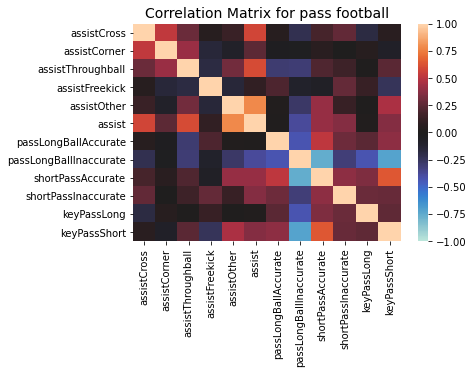

In [105]:
# Second correlation matrix for the data in all_pass18 dataset
dfCorr2 = pd.DataFrame(all_pass18)

corrMatrix2 = dfCorr2.corr()
ax = sns.heatmap(corrMatrix2,annot=False, vmin=-1, vmax=1, center=0)
#ax.set_ylim([0,20])
ax.set_title("Correlation Matrix for pass football", fontsize = 14)

plt.savefig("/project/Visualisation_graphs/Heatmap_pass.png")

From correlation matrix above, we can see that there are some columns which are very correlated. For example shortPassAccurate and passTotal and also keyPassShort and keyPassesTotal.
Therefore, we proceeded in dropping them.

In [94]:
all_pass18 = all_pass18.drop(columns={"keyPassesTotal", "passTotal"})
all_pass18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            32 non-null     object 
 1   assistCross             32 non-null     float64
 2   assistCorner            32 non-null     float64
 3   assistThroughball       32 non-null     float64
 4   assistFreekick          32 non-null     float64
 5   assistOther             32 non-null     float64
 6   assist                  32 non-null     float64
 7   passLongBallAccurate    32 non-null     float64
 8   passLongBallInaccurate  32 non-null     float64
 9   shortPassAccurate       32 non-null     float64
 10  shortPassInaccurate     32 non-null     float64
 11  keyPassLong             32 non-null     float64
 12  keyPassShort            32 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.4+ KB


#### Checking if there are any missing values

In [95]:
all_pass18.isnull().sum()

country_name              0
assistCross               0
assistCorner              0
assistThroughball         0
assistFreekick            0
assistOther               0
assist                    0
passLongBallAccurate      0
passLongBallInaccurate    0
shortPassAccurate         0
shortPassInaccurate       0
keyPassLong               0
keyPassShort              0
dtype: int64

### Merging the three dataframes we made (all_summary18, all_pass18, all_positions18) into one dataframe called all_football_18

In [96]:
# below we are going to merge our 3 main dataframes into 1.
# The variable will be called all_football_18
data_frames4 = [all_summary18, all_pass18, all_positions18]
all_football_18 = reduce(lambda left,right: pd.merge(left,right,on=['country_name'],
                                            how='inner'), data_frames4)
all_football_18.head()






,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,foulGivenPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,6,13.8,11,0,61.1,85.0,4.5,13.5,19.0,...,8.8,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,2,11.0,7,0,50.9,83.7,2.3,11.0,10.0,...,6.3,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,16,15.1,11,0,52.1,86.3,5.7,13.3,10.6,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,8,20.8,7,0,56.8,87.9,8.0,14.8,14.4,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,6,9.8,9,1,50.2,79.9,3.3,7.8,13.0,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


### Adding the actual positional ranking for each country in 2018

In [97]:
actual_ranking = pd.read_csv("Actual_Positional_Rankings_2018.csv")
actual_ranking

,Final positional ranking,Team
0,1,France
1,2,Croatia
2,3,Belgium
3,4,England
4,5,Brazil
5,6,Uruguay
6,7,Russia
7,8,Sweden
8,9,Mexico
9,10,Colombia


In [98]:
actual_ranking = actual_ranking.rename(columns=({"Final positional ranking":"Final_positional_ranking"}))
actual_ranking.head()


,Final_positional_ranking,Team
0,1,France
1,2,Croatia
2,3,Belgium
3,4,England
4,5,Brazil


In [99]:
#merge main dataframe with the actual ranking

all_football_18 = pd.merge(all_football_18, actual_ranking, 
  left_on='country_name', 
  right_on='Team',
    how="right"
)
all_football_18 = all_football_18.sort_values(by=("country_name")).reset_index(drop=True)
all_football_18 = all_football_18.drop(columns=("Team"))
all_football_18.head()



,country_name,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,foulGivenPG,...,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side,Final_positional_ranking
0,Argentina,6,13.8,11,0,61.1,85.0,4.5,13.5,19.0,...,38%,27%,35%,19%,49%,32%,27%,49%,24%,16
1,Australia,2,11.0,7,0,50.9,83.7,2.3,11.0,10.0,...,35%,20%,45%,27%,47%,25%,9%,79%,12%,25
2,Belgium,16,15.1,11,0,52.1,86.3,5.7,13.3,10.6,...,34%,26%,40%,27%,47%,26%,26%,56%,18%,3
3,Brazil,8,20.8,7,0,56.8,87.9,8.0,14.8,14.4,...,43%,29%,29%,25%,44%,31%,28%,60%,13%,5
4,Colombia,6,9.8,9,1,50.2,79.9,3.3,7.8,13.0,...,33%,22%,45%,29%,48%,23%,7%,66%,27%,10


In [100]:
# moving the Final_positional_ranking column to be just after the country_name so
# that it can be easier for the analysis
my_list = list(all_football_18)
all_football_18 = all_football_18[['country_name', 'Final_positional_ranking',
 'goal',
 'shotsPerGame',
 'yellow_card',
 'red_card',
 'possession_percentage',
 'passSuccess_percentage',
 'shotOnTargetPG',
 'dribbleWonPG',
 'foulGivenPG',
 'shotsConcededPG',
 'tacklePG',
 'interceptionPG',
 'foulsPG',
 'offsideGivenPG',
 'clearanceTotal',
 'duelAerialTotal',
 'duelAerialWon',
 'duelAerialLost',
 'stat-value',
 'assistCross',
 'assistCorner',
 'assistThroughball',
 'assistFreekick',
 'assistOther',
 'assist',
 'passLongBallAccurate',
 'passLongBallInaccurate',
 'shortPassAccurate',
 'shortPassInaccurate',
 'keyPassLong',
 'keyPassShort',
 'left_side',
 'middle_side',
 'right_side',
 'own_third',
 'middle_third',
 'opposition_third',
 'shot_left_side',
 'shot_middle_side',
 'shot_right_side']]
all_football_18.head()

,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,25,2,11.0,7,0,50.9,83.7,2.3,11.0,...,6.3,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


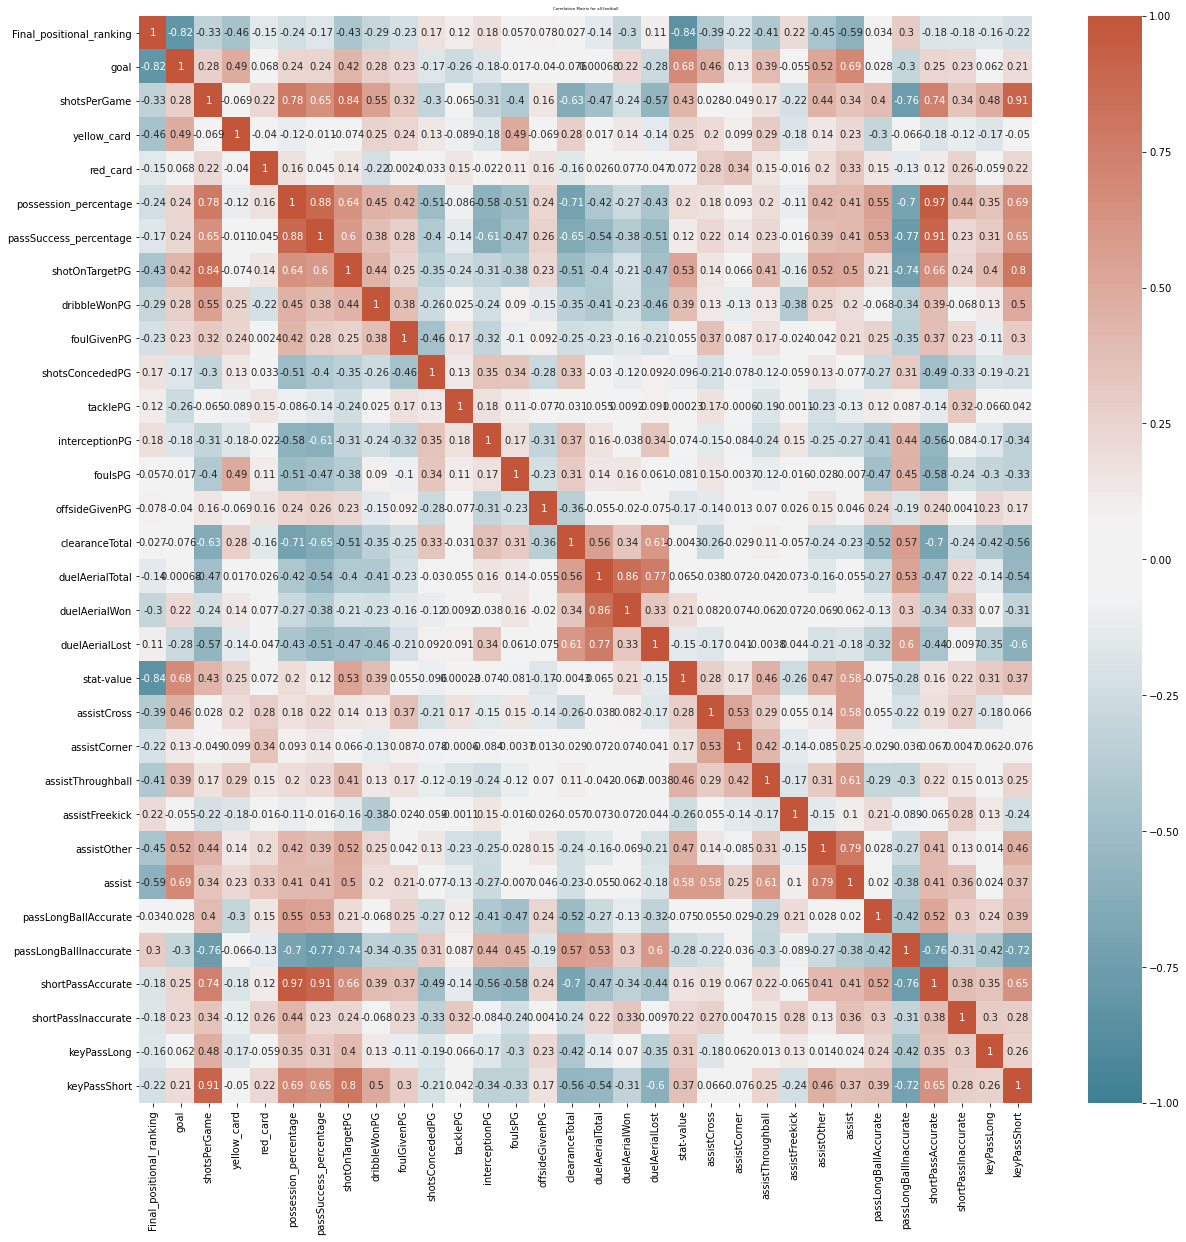

In [101]:
dfCorr4 = pd.DataFrame(all_football_18)

corrMatrix4 = dfCorr4.corr()
#ax = sns.heatmap(corrMatrix4,annot=False)
f, ax = plt.subplots(figsize = (20,20))
ax.set_title("Correlation Matrix for all football", fontsize = 4)
sns.heatmap(corrMatrix4, vmax=1, vmin=-1, annot=True, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True));





### Export dataset all_football_18 to be able to use it in other jupyter notebooks

In [102]:
all_football_18.to_csv("all_football_18.csv")